# EXPERIMENT 4

# PERFORMANCE COMPARISION OF BUCKET, RADIX & COUNT SORT

### Dependencie's

In [91]:
import numpy as np
import time
import matplotlib.pyplot as plt

### COUNTING SORT

In [92]:
def counting_sort(array1, max_val):
    m = max_val + 1
    count = [0] * m                
    
    for a in array1:
        count[a] += 1             
    i = 0
    for a in range(m):            
        for c in range(count[a]):  
            array1[i] = a
            i += 1
    return array1



In [93]:
def simcountSort(inp):
    time_lin=[]
    for i in range(len(inp)):
        print(inp[i])
        l=np.random.randint(1,100,inp[i])
        max_val=max(l)
        start=time.time()
        counting_sort(l,max_val)
        time_lin.append(time.time()-start)
    return time_lin


In [102]:
inp=[100000,150000,200000,250000,300000]

In [95]:
time_sim_c=simcountSort(inp)

100000
150000
200000
250000
300000


In [96]:
time_sim_c

[0.024909496307373047,
 0.03492259979248047,
 0.05187511444091797,
 0.05981707572937012,
 0.071807861328125]

### BUCKET SORT

In [97]:
def insertionSort(b): 
    for i in range(1, len(b)): 
        up = b[i] 
        j = i - 1
        while j >=0 and b[j] > up:  
            b[j + 1] = b[j] 
            j -= 1
        b[j + 1] = up     
    return b      
              
def bucketSort(x):
    m=max(x)
    x=x/(m+1)
    arr = [] 
    slot_num = 10   
    for i in range(slot_num): 
        arr.append([]) 
        
    for j in x: 
        index_b = int(slot_num * j)  
        arr[index_b].append(j) 
      
    for i in range(slot_num): 
        arr[i] = insertionSort(arr[i]) 
          
    k = 0
    for i in range(slot_num): 
        for j in range(len(arr[i])): 
            x[k] = arr[i][j] 
            k += 1
    x=x*(m+1)

    return x 

In [98]:
def simbucketSort(inp):
    time_lin=[]
    for i in range(len(inp)):
        print(inp[i])
        l=np.random.randint(1,100,inp[i])
        start=time.time()
        bucketSort(l)
        time_lin.append(time.time()-start)
    return time_lin

In [103]:
inp

[100000, 150000, 200000, 250000, 300000]

In [104]:
time_sim_b=simbucketSort(inp)

100000
150000
200000
250000
300000


In [118]:
time_sim_b=[42.010271310806274,
 94.72303557395935,
 157.93239498138428,
 240.25913071632385,
 351.818167924881]

### RADIX SORT

In [113]:
def radixSort(alist, base=10):
    if alist == []:
        return
 
    def key_factory(digit, base):
        def key(alist, index):
            return ((alist[index]//(base**digit)) % base)
        return key
    largest = max(alist)
    exp = 0
    while base**exp <= largest:
        alist = counting_sort(alist, base - 1, key_factory(exp, base))
        exp = exp + 1
    return alist
 
def counting_sort(alist, largest, key):
    c = [0]*(largest + 1)
    for i in range(len(alist)):
        c[key(alist, i)] = c[key(alist, i)] + 1
 
    c[0] = c[0] - 1 
    for i in range(1, largest + 1):
        c[i] = c[i] + c[i - 1]
 
    result = [None]*len(alist)
    for i in range(len(alist) - 1, -1, -1):
        result[c[key(alist, i)]] = alist[i]
        c[key(alist, i)] = c[key(alist, i)] - 1
 
    return result


In [114]:
def simradixSort(inp):
    time_lin=[]
    for i in range(len(inp)):
        print(inp[i])
        l=np.random.randint(1,100,inp[i])
        start=time.time()
        radixSort(l)
        time_lin.append(time.time()-start)
    return time_lin

In [119]:
time_sim_r=simradixSort(inp)

100000


C:\Users\ANKIT MISHRA\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  


150000
200000
250000
300000


In [120]:
time_sim_r

[0.6763589382171631,
 1.0152850151062012,
 1.3374500274658203,
 1.8072314262390137,
 2.0145816802978516]

## COMPARISION GRAPH

Text(0, 0.5, 'TIME TAKEN (in Seconds)')

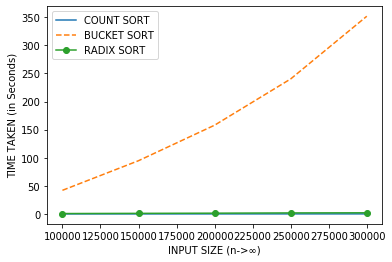

In [122]:
import matplotlib.pyplot as plt

plt.plot(inp,time_sim_c,"-",label='COUNT SORT')
plt.plot(inp,time_sim_b,'--',label="BUCKET SORT")
plt.plot(inp,time_sim_r,'o-',label='RADIX SORT')

plt.legend()
plt.xlabel('INPUT SIZE (n->∞)')
plt.ylabel('TIME TAKEN (in Seconds)')